In [61]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    precision_recall_curve
)


In [4]:
# cargar dataset
train_data = pd.read_csv('/Users/angel/Library/Mobile Documents/com~apple~CloudDocs/maestria/8.Modelos predictivos/proyecto final/python compresor/metropt+3+dataset/MetroPT3(AirCompressor).csv')
df = pd.DataFrame(train_data)
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
#agregamos columna failure
df['failure'] = 0
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [6]:
# El  dataset nos menciona unos tiempos donde ocurrieron fallos, definimos estas lineas en la columna de fallo como 1
df['timestamp'] = pd.to_datetime(df['timestamp'])
start_timestamp_1 = pd.to_datetime('2020-04-18 00:00:00')
end_timestamp_1 = pd.to_datetime('2020-04-18 23:59:00')
start_timestamp_2 = pd.to_datetime('2020-05-29 23:30:00')
end_timestamp_2= pd.to_datetime('2020-05-30 06:00:00')
start_timestamp_3 = pd.to_datetime('2020-06-05 10:00:00')
end_timestamp_3 = pd.to_datetime('2020-06-07 14:30:00')
start_timestamp_4 = pd.to_datetime('2020-07-15 14:30:00')
end_timestamp_4 = pd.to_datetime('2020-07-15 19:00:00')
j=0
for i in df["timestamp"]:
  if (((i >= start_timestamp_1) and (i <= end_timestamp_1)) or ((i >= start_timestamp_2) and (i <= end_timestamp_2)) or ((i >= start_timestamp_3) and (i <= end_timestamp_3)) or ((i >= start_timestamp_4) and (i <= end_timestamp_4))):
    df.at[j, 'failure'] = 1
  j+=1
  
#revision de valores
Failure_df = df[df['failure'] == 1]
Failure_df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
562564,5625640,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562565,5625650,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562566,5625660,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562567,5625670,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
562568,5625680,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172710,11727100,2020-07-15 18:59:20,-0.004,8.846,8.832,-0.008,8.848,73.650,3.5600,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1172711,11727110,2020-07-15 18:59:30,-0.006,8.816,8.800,-0.010,8.818,73.600,3.5575,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1172712,11727120,2020-07-15 18:59:40,-0.004,8.784,8.770,-0.008,8.788,73.500,3.6325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1172713,11727130,2020-07-15 18:59:50,-0.006,8.754,8.738,-0.008,8.758,73.325,3.5475,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [78]:
 # Features
x = df[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']] 

#Objetivo
y = df['failure']  

# Dividimos en test y train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [79]:
# regresion logisitica
logistic_regression = LogisticRegression(random_state=23, max_iter=1000).fit(x_train, y_train)
logistic_regression.score(x_test, y_test)

# Predicción
y_pred = logistic_regression.predict(x_test)

# Predicción de probabilidades (para ROC)
y_proba = logistic_regression.predict_proba(x_test)[:, 1]

# Métricas de clasificación
print("Resultados - Regresion Logistica")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Métricas 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# MAPE seguro
no_cero = y_test != 0
mape_safe = np.mean(np.abs((y_test[no_cero] - y_pred[no_cero]) / y_test[no_cero]))

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"MAPE seguro: {mape_safe:.4f}")

Resultados - Regresion Logistica
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    297344
           1       0.75      0.81      0.78      6046

    accuracy                           0.99    303390
   macro avg       0.87      0.90      0.89    303390
weighted avg       0.99      0.99      0.99    303390

Matriz de confusión:
 [[295722   1622]
 [  1167   4879]]
ROC AUC: 0.9944
RMSE: 0.0959
MAE: 0.0092
MAPE: 24077387506493.1094
MAPE seguro: 0.1930


In [115]:
# Resultados con timestamp
timestamps_test = df.loc[y_test.index, 'timestamp'].reset_index(drop=True)
resultados_log = pd.DataFrame({
    'timestamp': timestamps_test,
    'Real': y_test.values,
    'Predicho': y_pred
})
resultados_log_sorted = resultados_log.sort_values(by='timestamp').reset_index(drop=True)

In [116]:
fallos_predichos_log = resultados_log_sorted[resultados_log_sorted['Predicho'] == 1].reset_index(drop=True)
fallos_predichos_log

,timestamp,Real,Predicho
0,2020-03-22 23:53:42,0,1
1,2020-03-27 00:34:50,0,1
2,2020-03-29 10:53:16,0,1
3,2020-03-29 10:56:14,0,1
4,2020-03-29 11:03:11,0,1
...,...,...,...
6496,2020-08-29 13:03:53,0,1
6497,2020-08-30 17:26:57,0,1
6498,2020-08-30 19:58:26,0,1
6499,2020-08-31 09:42:16,0,1


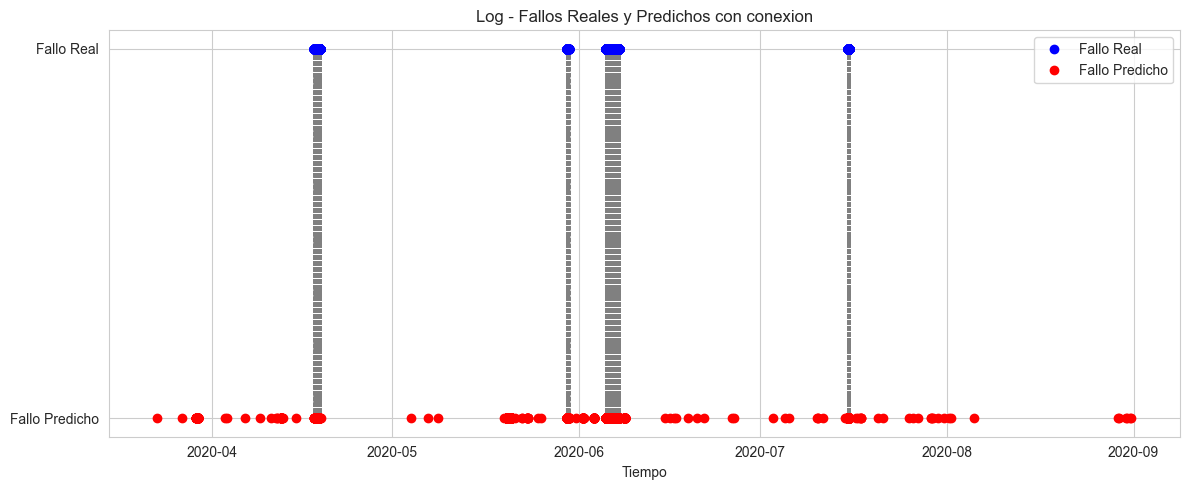

In [126]:
# Filtrar todos los fallos reales 
fallos_reales_log = resultados_log_sorted[resultados_log_sorted['Real'] == 1]

plt.figure(figsize=(12, 5))

# Línea azul para cada fallo real
for _, row in fallos_reales_log.iterrows():
    plt.plot([row['timestamp'], row['timestamp']], [1.1, 0.9], color='gray', linestyle='--', linewidth=0.8)

# Puntos de fallos reales y predichos
plt.plot(fallos_reales_log['timestamp'], [1.1]*len(fallos_reales_log), 'bo', label='Fallo Real')
plt.plot(fallos_predichos_log['timestamp'], [0.9]*len(fallos_predichos_log), 'ro', label='Fallo Predicho')

plt.yticks([0.9, 1.1], ['Fallo Predicho', 'Fallo Real'])
plt.xlabel('Tiempo')
plt.title('Log - Fallos Reales y Predichos con conexion')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

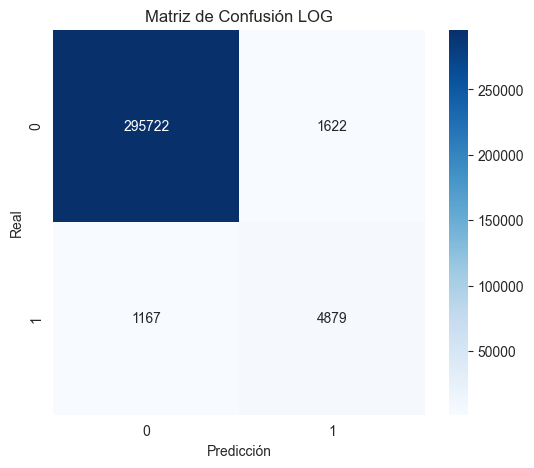

In [130]:
#Matriz de confusion regresion logistica
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión LOG')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [32]:
# Random forest
rf_model = RandomForestClassifier(random_state=23)
rf_model.fit(x_train, y_train)

# Predicción
y_pred_rf = rf_model.predict(x_test)
y_proba_rf = rf_model.predict_proba(x_test)[:, 1]  # para ROC AUC

# Métricas de clasificación
print("Resultados - Random Forest")
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")

# Métricas 
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# MAPE seguro
no_cero_rf = y_test != 0
mape_safe_rf = np.mean(np.abs((y_test[no_cero_rf] - y_pred_rf[no_cero_rf]) / y_test[no_cero_rf]))

print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MAPE: {mape_rf:.4f}")
print(f"MAPE seguro: {mape_safe_rf:.4f}")

Resultados - Random Forest
Matriz de confusión:
 [[297258     86]
 [    69   5977]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    297344
           1       0.99      0.99      0.99      6046

    accuracy                           1.00    303390
   macro avg       0.99      0.99      0.99    303390
weighted avg       1.00      1.00      1.00    303390

ROC AUC: 0.9999
RMSE: 0.0226
MAE: 0.0005
MAPE: 1276606242637.7358
MAPE seguro: 0.0114


In [118]:
resultados_rf = pd.DataFrame({
    'timestamp': timestamps_test,
    'Real': y_test.values,
    'Predicho': y_pred_rf
})
resultados_rf_sorted = resultados_rf.sort_values(by='timestamp').reset_index(drop=True)

In [119]:
fallos_predichos_rf = resultados_rf_sorted[resultados_rf_sorted['Predicho'] == 1].reset_index(drop=True)
fallos_predichos_rf

,timestamp,Real,Predicho
0,2020-04-18 00:25:08,1,1
1,2020-04-18 00:26:27,1,1
2,2020-04-18 00:26:57,1,1
3,2020-04-18 00:30:45,1,1
4,2020-04-18 00:30:55,1,1
...,...,...,...
6058,2020-07-15 18:48:17,1,1
6059,2020-07-15 18:49:16,1,1
6060,2020-07-15 18:55:52,1,1
6061,2020-07-15 18:56:22,1,1


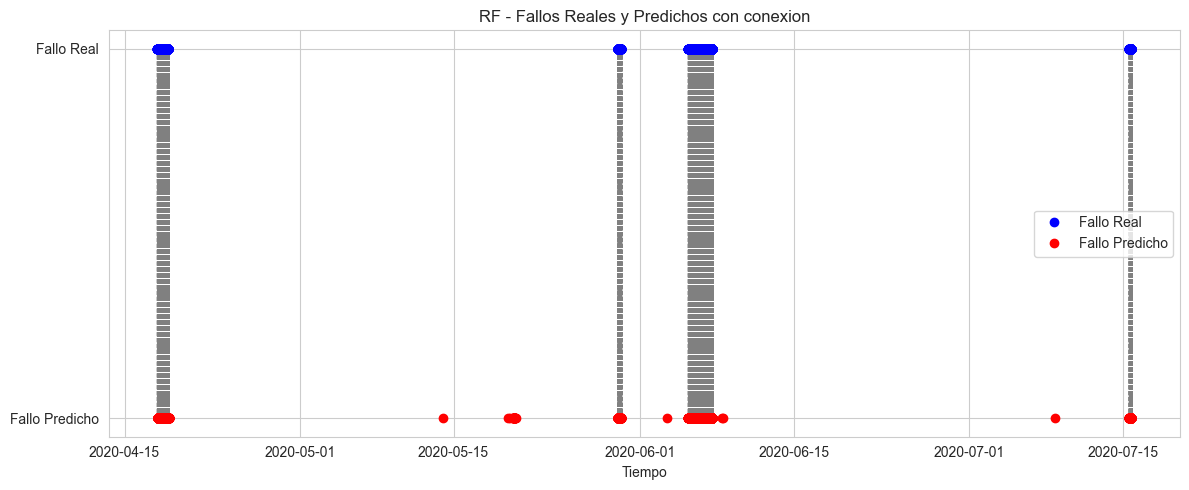

In [125]:
# Filtrar todos los fallos reales 
fallos_reales_rf = resultados_rf_sorted[resultados_log_sorted['Real'] == 1]

plt.figure(figsize=(12, 5))

# Línea azul para cada fallo real
for _, row in fallos_reales_rf.iterrows():
    plt.plot([row['timestamp'], row['timestamp']], [1.1, 0.9], color='gray', linestyle='--', linewidth=0.8)

# Puntos de fallos reales y predichos
plt.plot(fallos_reales_rf['timestamp'], [1.1]*len(fallos_reales_rf), 'bo', label='Fallo Real')
plt.plot(fallos_predichos_rf['timestamp'], [0.9]*len(fallos_predichos_rf), 'ro', label='Fallo Predicho')

plt.yticks([0.9, 1.1], ['Fallo Predicho', 'Fallo Real'])
plt.xlabel('Tiempo')
plt.title('RF - Fallos Reales y Predichos con conexion')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

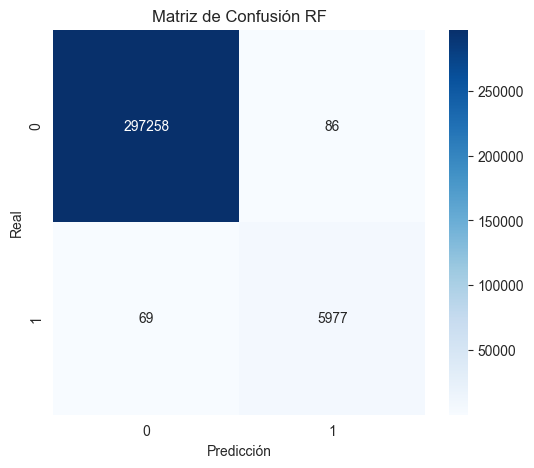

In [131]:
#Matriz de confusion Random forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión RF')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [133]:
# KNN neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

# Predicción 
y_pred_knn = knn_model.predict(x_test)

# Predicción (para ROC AUC)
y_proba_knn = knn_model.predict_proba(x_test)[:, 1] 

# Métricas de clasificación
print("Resultados - k-NN Classifier")
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_knn))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_knn):.4f}")

# Métricas
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)

# MAPE seguro
no_cero_knn = y_test != 0
mape_safe_knn = np.mean(np.abs((y_test[no_cero_knn] - y_pred_knn[no_cero_knn]) / y_test[no_cero_knn]))

print(f"RMSE: {rmse_knn:.4f}")
print(f"MAE: {mae_knn:.4f}")
print(f"MAPE: {mape_knn:.4f}")
print(f"MAPE seguro: {mape_safe_knn:.4f}")

Resultados - k-NN Classifier
Matriz de confusión:
 [[297159    185]
 [   197   5849]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    297344
           1       0.97      0.97      0.97      6046

    accuracy                           1.00    303390
   macro avg       0.98      0.98      0.98    303390
weighted avg       1.00      1.00      1.00    303390

ROC AUC: 0.9963
RMSE: 0.0355
MAE: 0.0013
MAPE: 2746187847534.6646
MAPE seguro: 0.0326


In [121]:
resultados_knn = pd.DataFrame({
    'timestamp': timestamps_test,
    'Real': y_test.values,
    'Predicho': y_pred_knn
})
resultados_knn_sorted = resultados_knn.sort_values(by='timestamp').reset_index(drop=True)

In [122]:
fallos_predichos_knn = resultados_knn_sorted[resultados_knn_sorted['Predicho'] == 1].reset_index(drop=True)
fallos_predichos_knn

,timestamp,Real,Predicho
0,2020-04-18 00:25:08,1,1
1,2020-04-18 00:26:27,1,1
2,2020-04-18 00:26:57,1,1
3,2020-04-18 00:30:45,1,1
4,2020-04-18 00:30:55,1,1
...,...,...,...
6029,2020-07-15 18:46:27,1,1
6030,2020-07-15 18:46:37,1,1
6031,2020-07-15 18:47:47,1,1
6032,2020-07-15 18:48:17,1,1


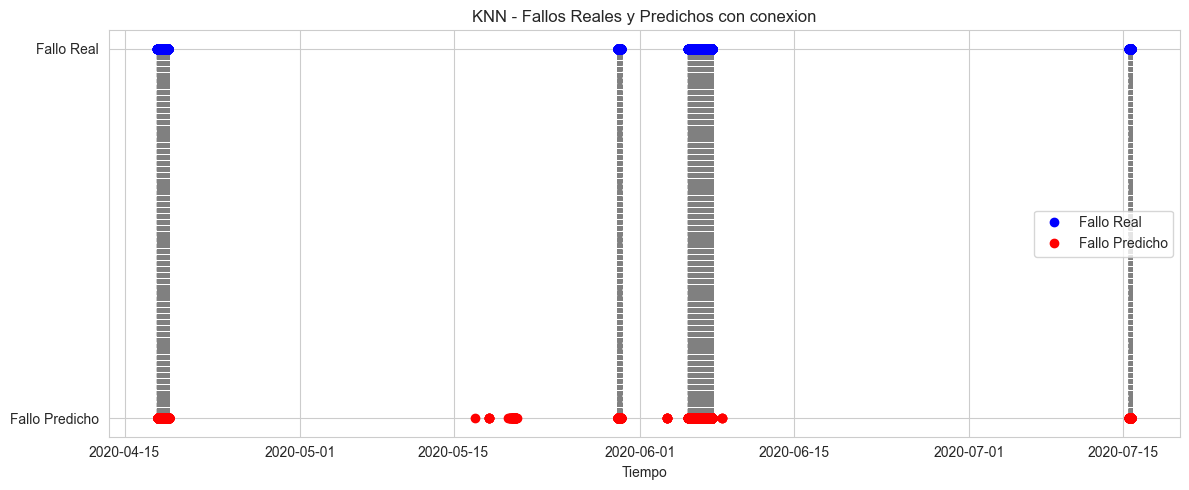

In [124]:
# Filtrar todos los fallos reales 
fallos_reales_knn = resultados_knn_sorted[resultados_log_sorted['Real'] == 1]

plt.figure(figsize=(12, 5))

# Línea azul para cada fallo real
for _, row in fallos_reales_knn.iterrows():
    plt.plot([row['timestamp'], row['timestamp']], [1.1, 0.9], color='gray', linestyle='--', linewidth=0.8)

# Puntos de fallos reales y predichos
plt.plot(fallos_reales_knn['timestamp'], [1.1]*len(fallos_reales_knn), 'bo', label='Fallo Real')
plt.plot(fallos_predichos_knn['timestamp'], [0.9]*len(fallos_predichos_knn), 'ro', label='Fallo Predicho')

plt.yticks([0.9, 1.1], ['Fallo Predicho', 'Fallo Real'])
plt.xlabel('Tiempo')
plt.title('KNN - Fallos Reales y Predichos con conexion')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

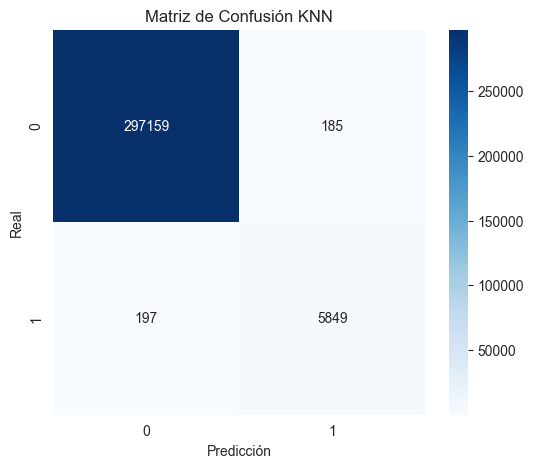

In [132]:
#Matriz de confusion KNN
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión KNN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()